This file is for development for testing code for the development of an Data Ingestion Pipeline.

Starting from basics... CSV

In [22]:
#imports
%matplotlib inline
import csv
import os
import requests
import pandas as pd
import glob

In [1]:
#Basic but works, could write an array filling application that fits into the for loop.

with open('20160701.txt', 'rb') as csvfile:
    asxTest = csv.reader(csvfile, delimiter=',')
    for row in asxTest:
        i = 1
        
        print ' '.join(row)
        
        if i >= 6:
            print '\n'
            i = 1
        i += 1
        

Thanks to contributions from AWAK, shall use pandas to import the data as that seems pretty fricken easy.

Next step is to create a company object in python, then ingest multiple days data to build a histogram from the company object.



In [2]:
#Define company object 
#Note - if multiple constructors are required look up @classmethod

#import dependencies

import numpy as np
import pandas as pd

class asxCompany:
    #class variables and objects
    #code = ''        ASX Code for Company
    #name = ''        Name of Company
    #ind = ''         Industry Group of Company
    #data = np array  Historic Data
    
    def __init__(self,code,data):
        self.code = code
        self.data = data
    
    
    


    

In [17]:
stocks = pd.read_csv('20160701.txt',sep=',',header=None)
stocks.columns = ['code', 'date', 'open', 'low', 'high', 'close', 'volume']

ASX_1AG = asxCompany(stocks.loc[0,'code'], pd.DataFrame(stocks[:1]))
    

In [20]:
print ASX_1AG.code
print ASX_1AG.data


1AG
  code      date   open    low   high  close  volume
0  1AG  20160701  0.054  0.054  0.054  0.054   20000


instance

In [60]:
#Snippets  
#class methods
#def sumTest(self):#need to include 'self' as the first reference in a class method, this 
                      #provides the method with access to the local class attributes
#        a = self.x + self.y
#       return a


# Working Code!
##This shit works!

In [40]:
#This appends all files with .txt extention to a dataframe

path = "/home/tom/finAnalytics/finAnalytics/testingGrounds/ingestion/"
files = glob.glob(os.path.join(path,"*.txt"))

dataList = []
for dataFile in files:
    df = pd.read_csv(dataFile,sep=',',header=None)
    dataList.append(df)
data = pd.concat(dataList)
data.columns = ['code', 'date', 'open', 'low', 'high', 'close', 'volume']

In [43]:
codes = data['code'].unique() #lists all unique ASX codes in data table



In [53]:
compData = data.loc[data['code'] == '1AG'] # This query returns all rows from the dataframe that has the 
                                # ASX code '1AG'

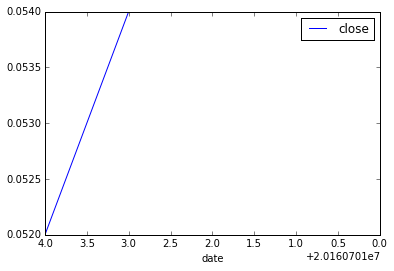

In [57]:
compData.plot(x='date',y='close') #matplotlib accepts column headings as kwargs!!!!! makes plotting fricking simple

In [59]:
data

,code,date,open,low,high,close,volume
0,1AG,20160705,0.052,0.054,0.052,0.052,170000
1,1PG,20160705,0.640,0.670,0.605,0.605,6417102
2,1ST,20160705,0.055,0.055,0.054,0.054,142500
3,3PL,20160705,0.745,0.810,0.740,0.805,708090
4,4DS,20160705,0.022,0.022,0.022,0.022,1447667
5,88E,20160705,0.032,0.032,0.031,0.031,8261836
6,8EC,20160705,1.010,1.010,1.010,1.010,315
7,8IH,20160705,0.795,0.795,0.770,0.770,62515
8,9SP,20160705,0.150,0.160,0.150,0.150,514926
9,A2M,20160705,1.765,1.775,1.735,1.735,2125114
